In [126]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [127]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [128]:
print "Training data =", len(mnist.train.labels)
print "Testing data =", len(mnist.test.labels)

Training data = 55000
Testing data = 10000


In [129]:
mnist.test.labels[0:5, :]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [130]:
mnist.test.cls = np.array([label.argmax() for label in mnist.test.labels])
print mnist.test.cls

[7 2 1 ..., 4 5 6]


In [131]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
classes = 10

In [132]:
def plot_figure(images, cls_true, cls_pred = None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i , ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
        
        if cls_pred is None:
            xlabel = "True :", cls_true[i]
        else:
            xlabel = "True :", cls_true[i], "Pred :", cls_pred[i]
        
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

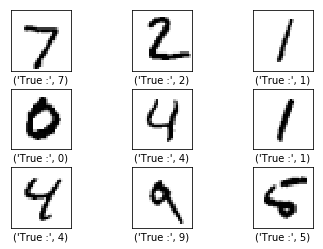

In [133]:
images = mnist.test.images[0:9]
cls_true = mnist.test.cls[0:9]
plot_figure(images = images, cls_true= cls_true)

In [134]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
t_true = tf.placeholder(tf.float32, [None, classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [135]:
weights = tf.Variable(tf.zeros([img_size_flat, classes]))
biases = tf.Variable(tf.zeros([classes]))

In [136]:
logits = tf.matmul(x,weights) + biases

In [137]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension = 1)

In [138]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = t_true)
cost = tf.reduce_mean(cross_entropy)

In [139]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [140]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
print correct_prediction

Tensor("Equal_5:0", shape=(?,), dtype=bool)


In [141]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [142]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [143]:
batch_size = 100


def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = mnist.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, t_true: y_true_batch}
        sess.run(optimizer, feed_dict = feed_dict_train)

In [144]:
feed_dict_test = {x: mnist.test.images,
                  t_true: mnist.test.labels,
                  y_true_cls : mnist.test.cls
}


def print_accuracy():
    acc = sess.run(accuracy, feed_dict = feed_dict_test)
    print "Accuracy on testset:", acc*100



In [145]:
def print_conf_mat():
    cls_true = mnist.test.cls
    cls_pred = sess.run(y_pred_cls, feed_dict= feed_dict_test)
    cm = confusion_matrix(t_true = cls_true, y_pred = cls_pred)
    print cm
    
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(classes)
    plt.xticks(tick_marks, range(classes))
    plt.yticks(tick_marks, range(classes))
    plt.xlabel('Prediction')
    plt.ylabel('True')


In [146]:
print "srujal5292@gmail.com"

srujal5292@gmail.com


In [147]:
def plot_example_errors():
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls], feed_dict = feed_dict_test)
    
    incorrect = (correct == False)
    images = mnist.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = mnist.test.cls[incorrect]
    
    plot_figure(images = images[0:9], cls_true = cls_true[0:9], cls_pred = cls_pred[0:9])

In [148]:
print_accuracy()

Accuracy on testset: 9.7999997437


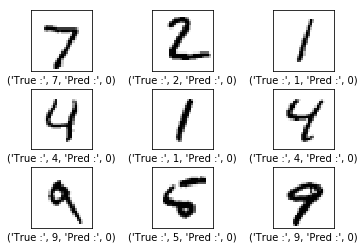

In [149]:
plot_example_errors()

In [150]:
optimize(num_iterations = 1)
print_accuracy()

Accuracy on testset: 29.1399985552


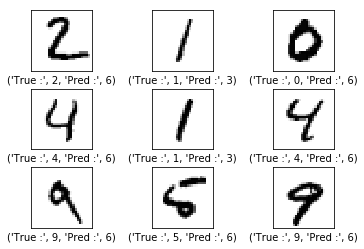

In [151]:
plot_example_errors()

In [154]:
def plot_weights():
    
    W = sess.run(weights)
    
    W_min = np.min(W)
    W_max = np.max(W)
    
    fig,ax = plt.subplots(2,5)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i, axes in enumerate(ax.flat):
        if i<10:
            image = W[:, i].reshape(img_shape)
            axes.set_xlabel("Weights: {0}".format(i))
            axes.imshow(image, vmin=W_min, vmax = W_max, cmap = 'seismic')
            
        axes.set_xticks([])
        axes.set_yticks([])

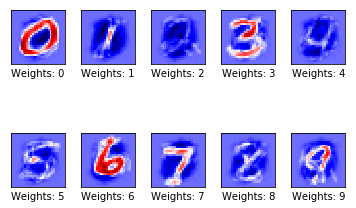

In [155]:
plot_weights()

Accuracy on testset: 75.5800008774


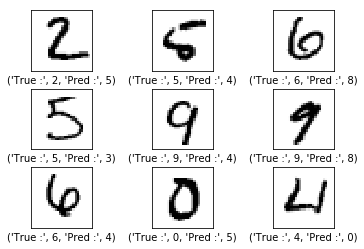

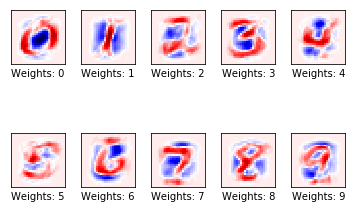

In [158]:
optimize(num_iterations = 5)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on testset: 83.0999970436


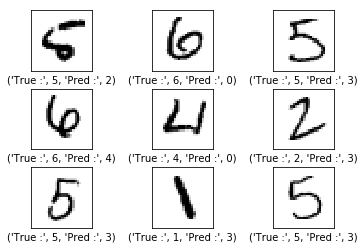

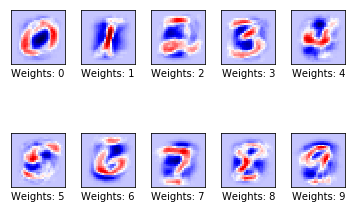

In [159]:
optimize(num_iterations = 8)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on testset: 91.9700026512


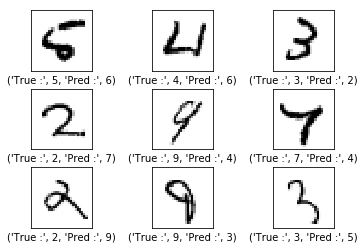

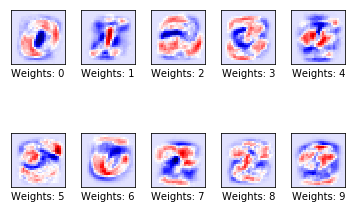

In [161]:
optimize(num_iterations = 1000)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on testset: 92.3099994659


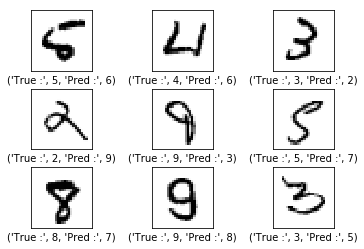

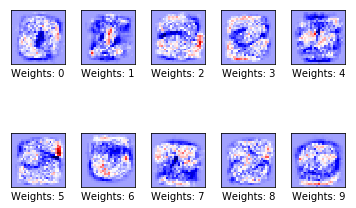

In [162]:
optimize(num_iterations = 10000)
print_accuracy()
plot_example_errors()
plot_weights()

Accuracy on testset: 92.3300027847


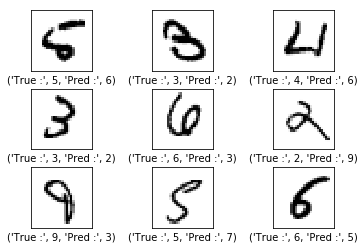

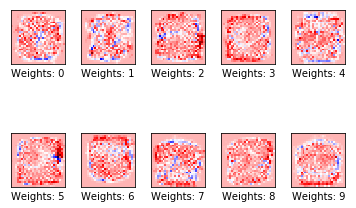

In [163]:
optimize(num_iterations = 100000)
print_accuracy()
plot_example_errors()
plot_weights()